In [1]:
import tensorflow as tf
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
from skimage import io
import time

/home/palak/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=[])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def lrelu(x, th=0.2):
    return tf.maximum(th * x, x)

In [4]:
x= tf.placeholder(tf.float32, shape=(None,28,28,1))
z= tf.placeholder(tf.float32, shape=(None, 100))

In [5]:
def generator(x):
    with tf.variable_scope('generator'):
        
        #Dense Layer
        x=tf.layers.dense(x,7*7*256)
        
        #Reshaping it to 3d again to apply convolution
        x= tf.reshape(x,(-1,7,7,256))
        lrelu0 = lrelu(tf.layers.batch_normalization(x, training=True), 0.2)
        
        # 1st hidden layer
        conv1 = tf.layers.conv2d_transpose(lrelu0, 128, [5, 5], strides=(2, 2), padding='same')
        lrelu1 = lrelu(tf.layers.batch_normalization(conv1, training=True), 0.2)
        #14*14*128

        # 2nd hidden layer
        conv2 = tf.layers.conv2d_transpose(lrelu1, 64, [5, 5], strides=(2, 2), padding='same')
        lrelu2 = lrelu(tf.layers.batch_normalization(conv2, training=True), 0.2)
        #28*28*64
        
        # 3rd hidden layer
        conv3 = tf.layers.conv2d_transpose(lrelu2, 1, [5, 5], strides=(1, 1), padding='same')
        #28*28*1
        
        out = tf.tanh(conv3)

        return out


In [6]:
def discriminator(x, reuse=False):
    with tf.variable_scope('discriminator', reuse=reuse):
        
        
        # 1st hidden layer
        conv1 = tf.layers.conv2d(x, 128, [5, 5], strides=(2, 2), padding='same')
        lrelu1 = lrelu(conv1, 0.2)
        #14*14*128

        # 2nd hidden layer
        conv2 = tf.layers.conv2d(lrelu1, 256, [5, 5], strides=(2, 2), padding='same')
        lrelu2 = lrelu(tf.layers.batch_normalization(conv2, training=True), 0.2)
        #7*7*256

        flatten= tf.layers.flatten(lrelu2)
        
        #Dense Layer
        logits = tf.layers.dense(flatten, 1)
        
        return logits


In [7]:
generated_image = generator(z)
print(generated_image.shape)
D_real = discriminator(x, reuse=False)
D_fake = discriminator(generated_image, reuse=True)

# Losses
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real, labels=tf.ones_like(D_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake, labels=tf.zeros_like(D_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake, labels=tf.ones_like(D_fake)))


t_vars = tf.trainable_variables()
d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
g_vars = [var for var in t_vars if var.name.startswith('generator')]

# Optimizers
D_opt = tf.train.AdamOptimizer(2e-4).minimize(D_loss, var_list=d_vars)
G_opt = tf.train.AdamOptimizer(2e-4).minimize(G_loss, var_list=g_vars)

(?, 28, 28, 1)


In [8]:
session = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [9]:
# results save folder
root = 'MNIST_DCGAN_results/'
model = 'MNIST_DCGAN_'
if not os.path.isdir(root):
    os.mkdir(root)
if not os.path.isdir(root + 'Fixed_results'):
    os.mkdir(root + 'Fixed_results')

In [10]:
print('training start!')
start_time = time.time()
epoch=100
batch_size=100

training start!


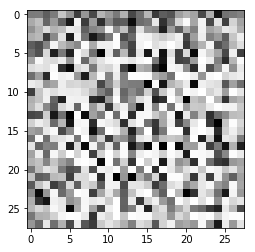

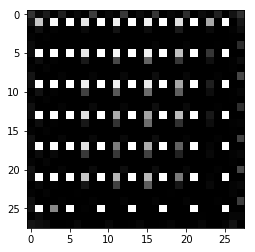

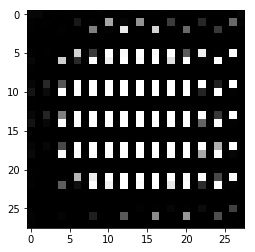

time: 638.5209865570068


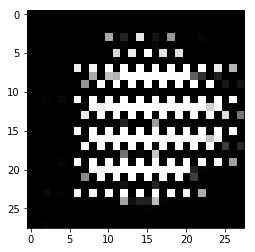

epoch: 0
discriminator loss: 0.756219208240509        generator loss: 14.221967697143555


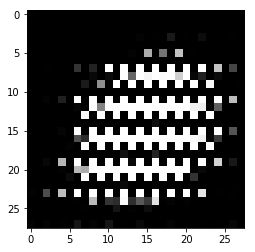

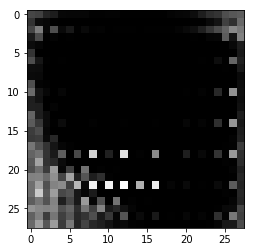

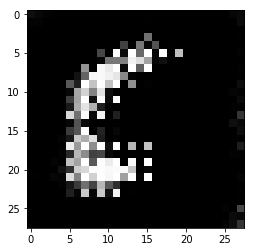

time: 634.8563623428345


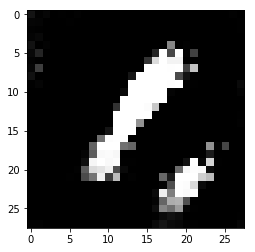

epoch: 1
discriminator loss: 0.08334571868181229        generator loss: 4.157769203186035


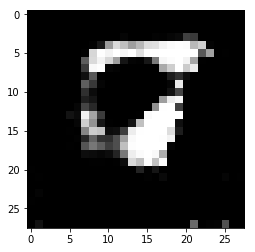

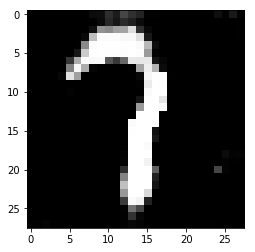

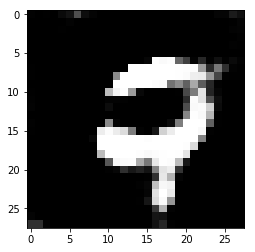

time: 638.3509049415588


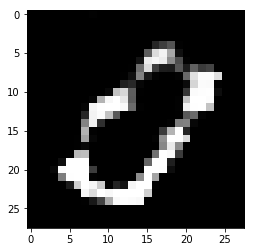

epoch: 2
discriminator loss: 0.5495307445526123        generator loss: 4.058435916900635


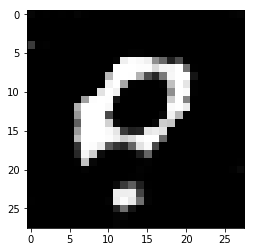

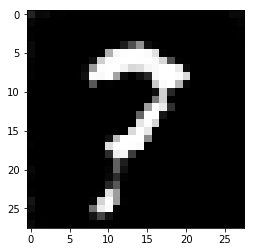

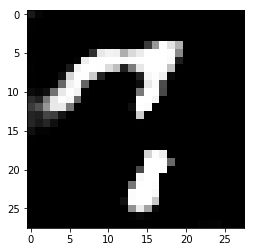

time: 632.6086511611938


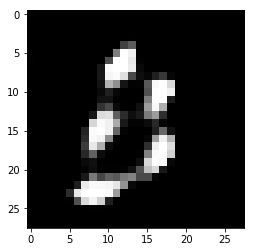

epoch: 3
discriminator loss: 0.16802829504013062        generator loss: 2.6619012355804443


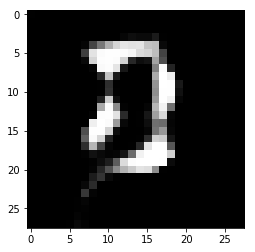

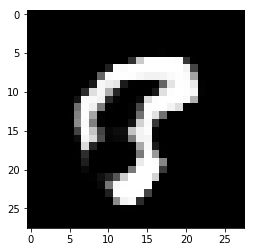

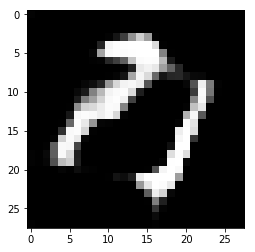

time: 673.1624524593353


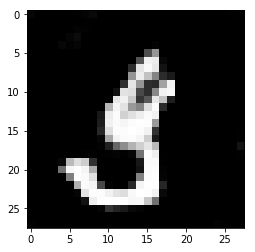

epoch: 4
discriminator loss: 0.4807705879211426        generator loss: 2.5118138790130615


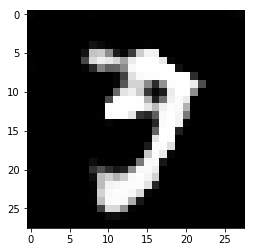

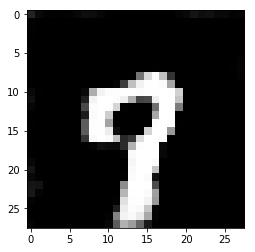

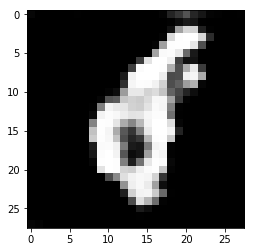

time: 688.0504488945007


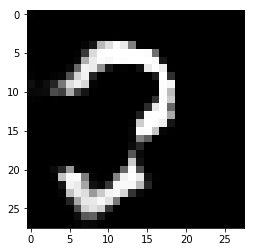

epoch: 5
discriminator loss: 0.22494643926620483        generator loss: 2.627636432647705


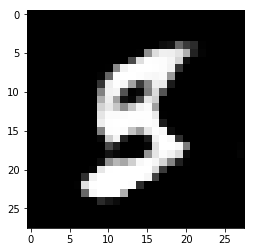

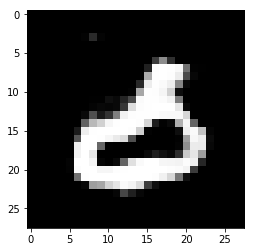

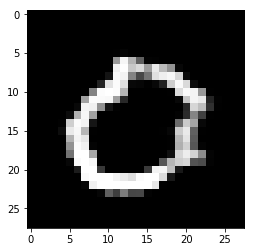

time: 701.1735935211182


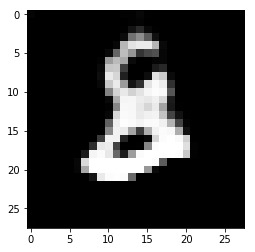

epoch: 6
discriminator loss: 0.8553114533424377        generator loss: 2.6860604286193848


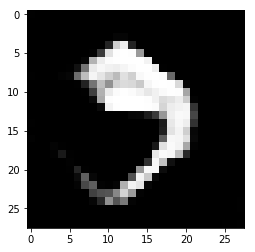

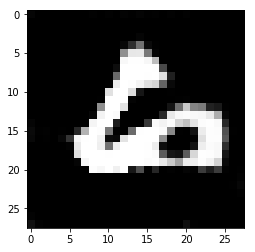

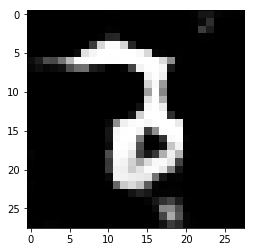

time: 703.4218380451202


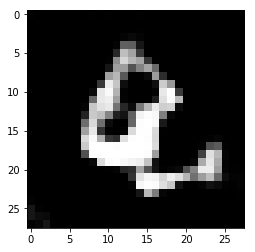

epoch: 7
discriminator loss: 0.26929283142089844        generator loss: 4.335276126861572


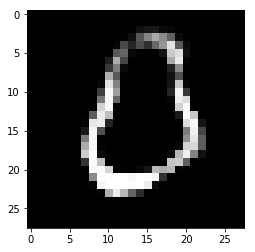

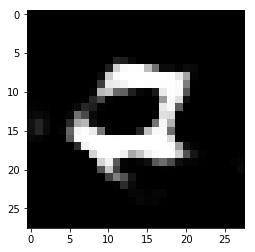

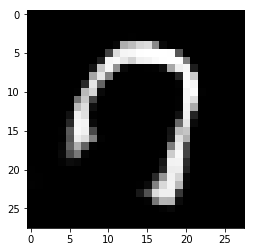

time: 704.7029032707214


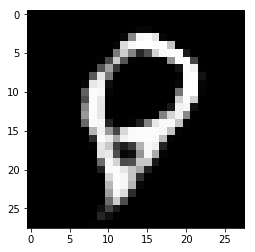

epoch: 8
discriminator loss: 0.2922864854335785        generator loss: 2.252122402191162


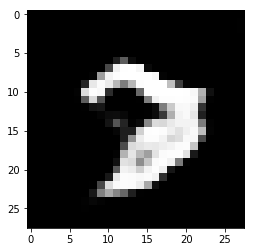

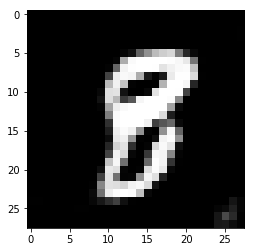

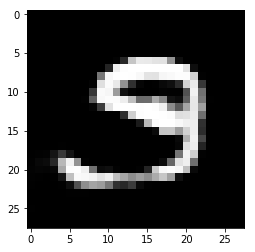

time: 685.1573131084442


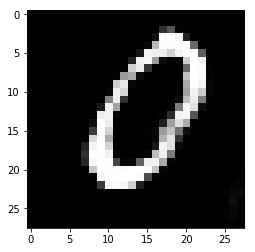

epoch: 9
discriminator loss: 0.44530585408210754        generator loss: 2.2755706310272217


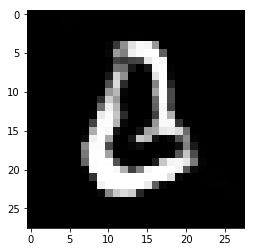

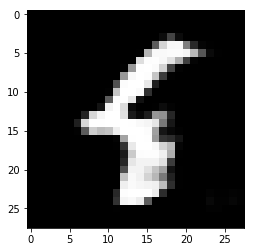

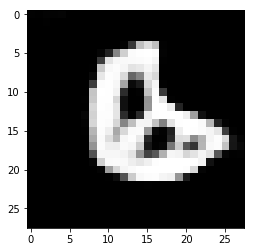

time: 642.7039561271667


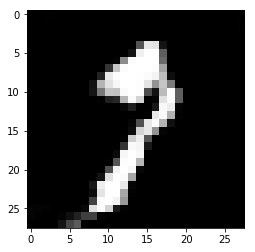

epoch: 10
discriminator loss: 0.26087450981140137        generator loss: 4.16957950592041


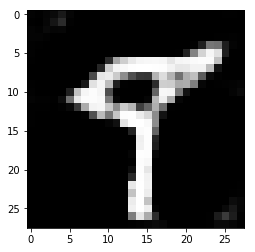

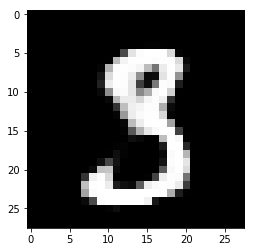

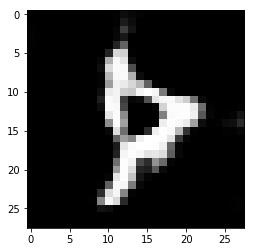

time: 685.4187886714935


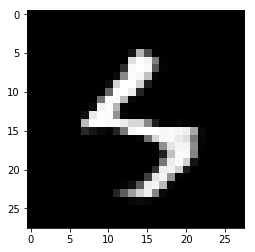

epoch: 11
discriminator loss: 0.2589864134788513        generator loss: 3.3542094230651855


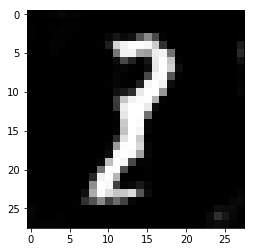

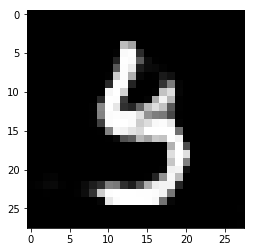

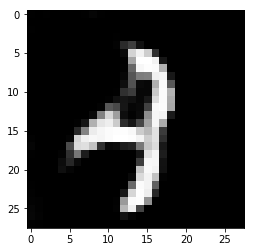

time: 672.6641788482666


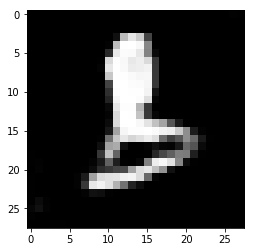

epoch: 12
discriminator loss: 0.5744501352310181        generator loss: 4.3922810554504395


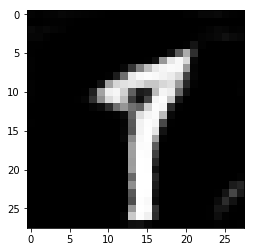

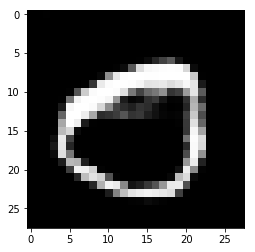

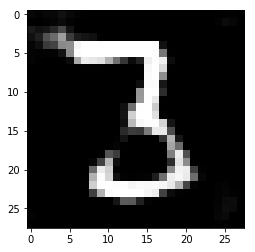

time: 674.1761260032654


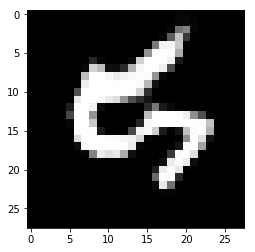

epoch: 13
discriminator loss: 0.3215469717979431        generator loss: 2.2831907272338867


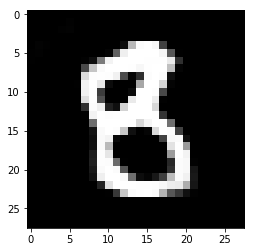

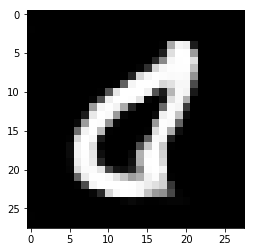

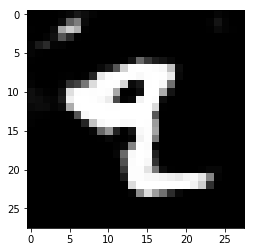

time: 654.3724915981293


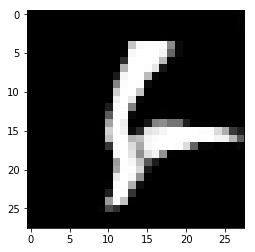

epoch: 14
discriminator loss: 0.5112345218658447        generator loss: 2.254662275314331


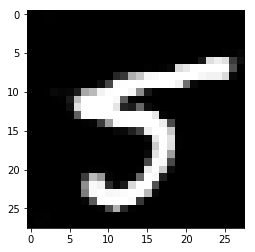

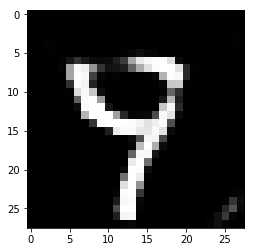

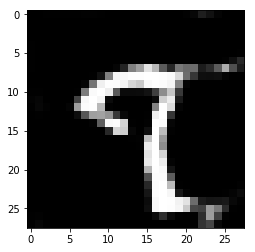

time: 679.5086731910706


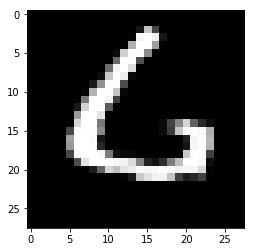

epoch: 15
discriminator loss: 0.15916801989078522        generator loss: 2.942920446395874


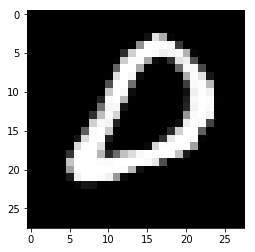

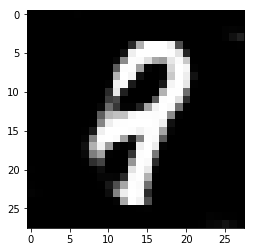

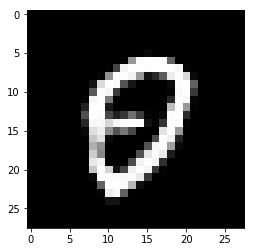

time: 663.35089635849


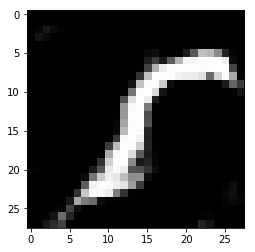

epoch: 16
discriminator loss: 0.42422419786453247        generator loss: 2.417386531829834


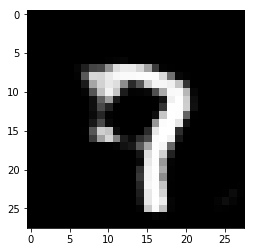

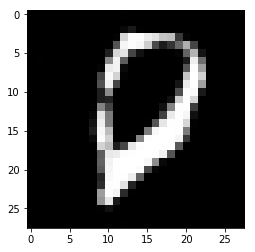

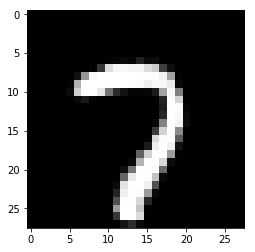

time: 672.0609698295593


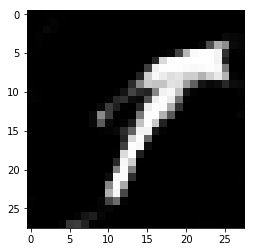

epoch: 17
discriminator loss: 0.2837895452976227        generator loss: 3.1205761432647705


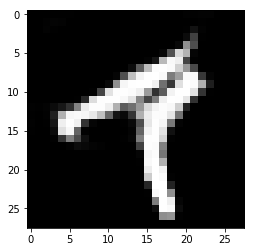

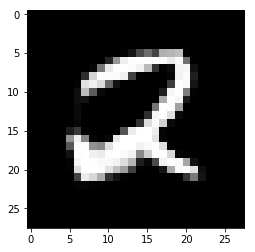

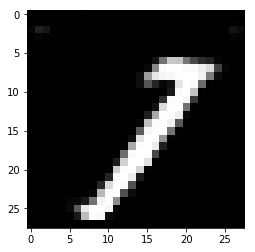

time: 664.5020544528961


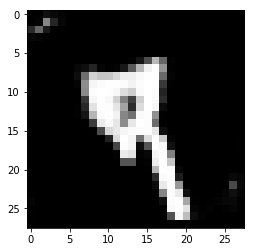

epoch: 18
discriminator loss: 0.3566286265850067        generator loss: 3.5872719287872314


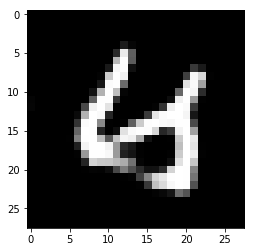

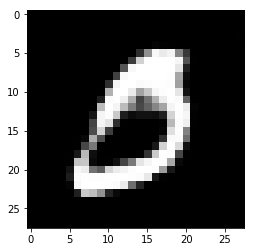

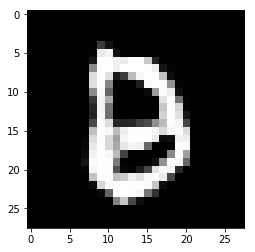

time: 677.3733355998993


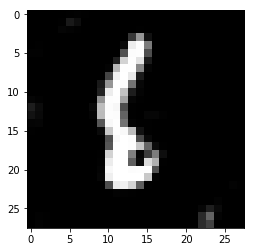

epoch: 19
discriminator loss: 0.14496487379074097        generator loss: 4.4416279792785645


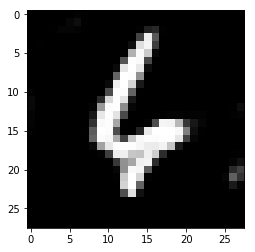

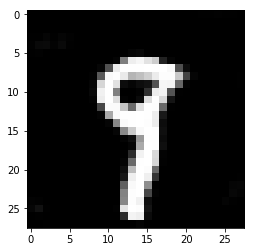

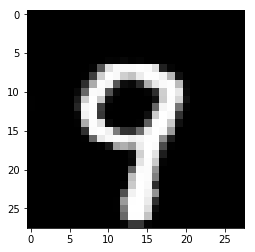

time: 665.4232976436615


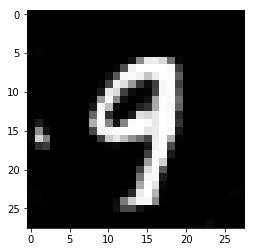

epoch: 20
discriminator loss: 0.2779424786567688        generator loss: 2.221278667449951


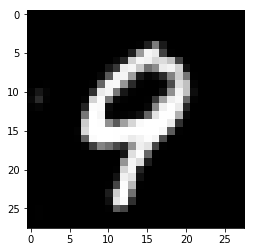

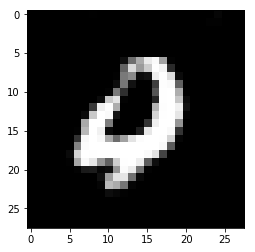

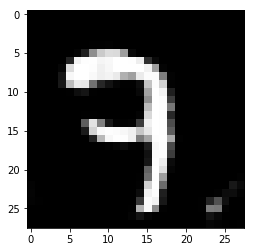

time: 705.3259708881378


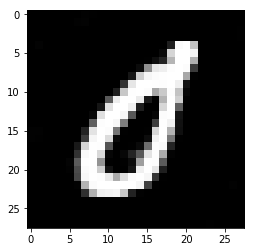

epoch: 21
discriminator loss: 0.4029199481010437        generator loss: 1.7243374586105347


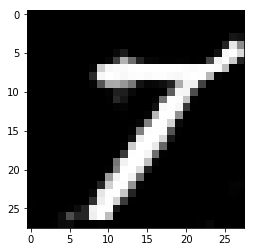

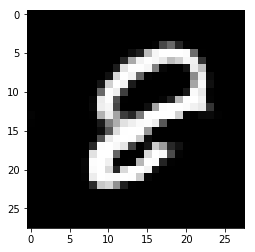

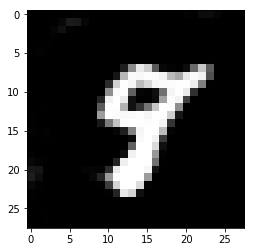

time: 677.4513921737671


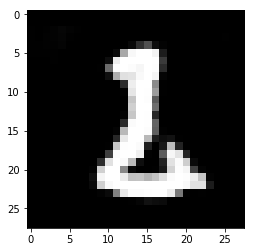

epoch: 22
discriminator loss: 0.3993874490261078        generator loss: 3.516038417816162


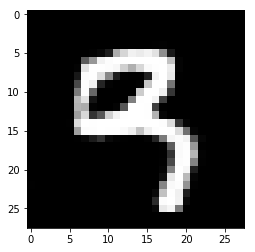

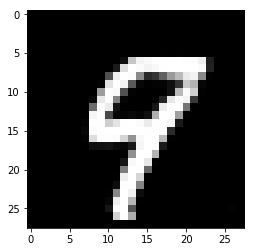

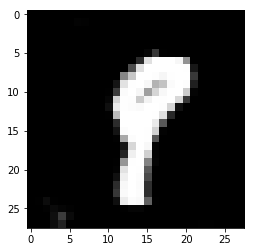

time: 672.9891457557678


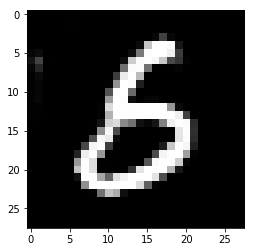

epoch: 23
discriminator loss: 0.7544301748275757        generator loss: 3.382441997528076


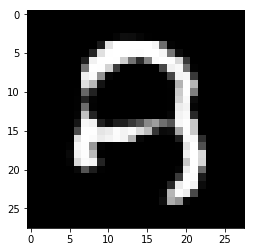

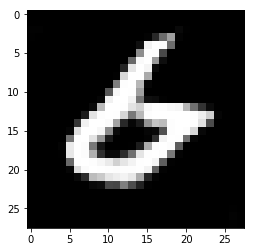

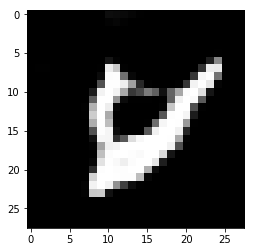

time: 690.8346812725067


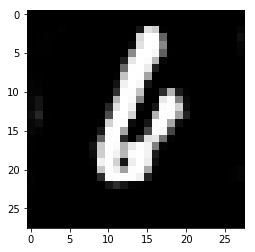

epoch: 24
discriminator loss: 0.26004257798194885        generator loss: 3.6097733974456787


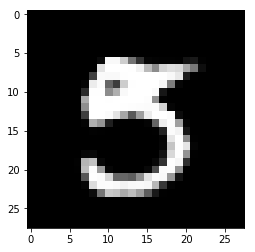

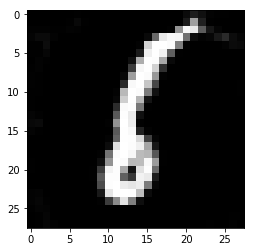

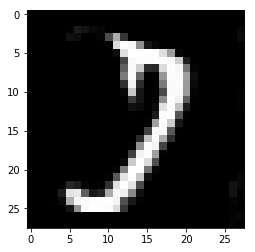

time: 667.0301826000214


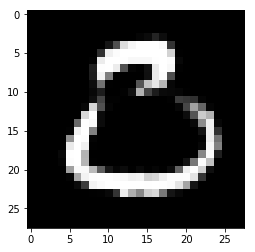

epoch: 25
discriminator loss: 0.21590787172317505        generator loss: 3.092543363571167


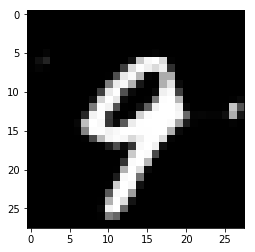

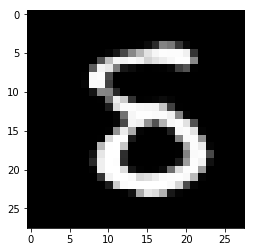

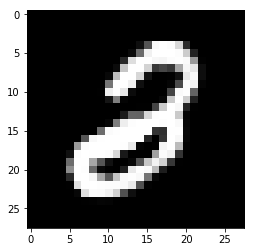

time: 647.5778329372406


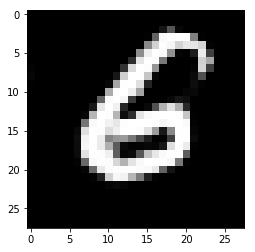

epoch: 26
discriminator loss: 0.3595418334007263        generator loss: 2.8827972412109375


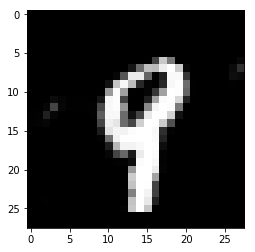

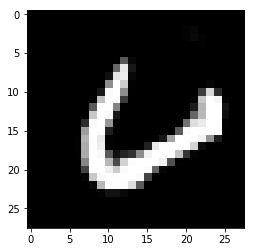

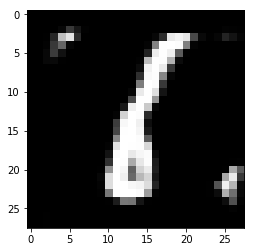

time: 631.3108720779419


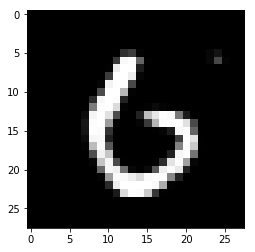

epoch: 27
discriminator loss: 0.5893508791923523        generator loss: 0.9608463644981384


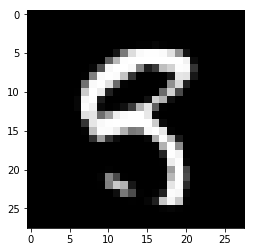

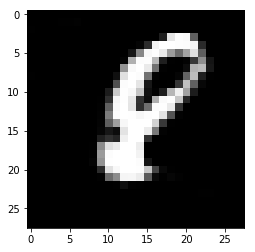

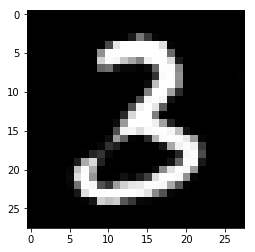

time: 632.6614301204681


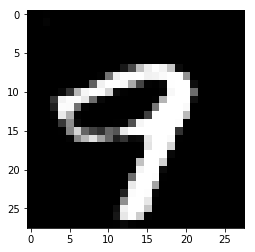

epoch: 28
discriminator loss: 0.3630783259868622        generator loss: 2.2739784717559814


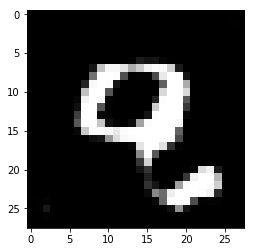

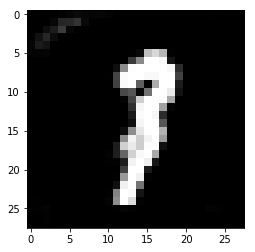

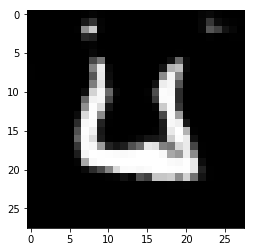

time: 633.8216142654419


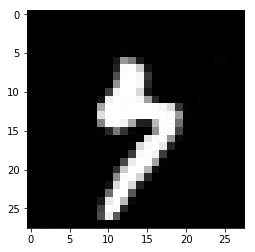

epoch: 29
discriminator loss: 0.24152009189128876        generator loss: 2.436880588531494


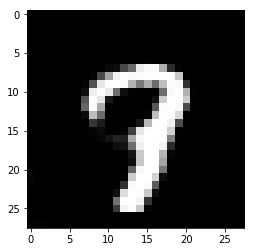

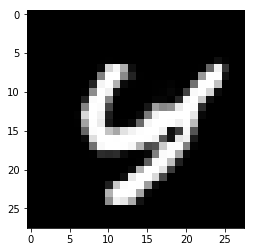

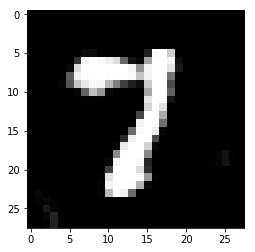

time: 635.1457197666168


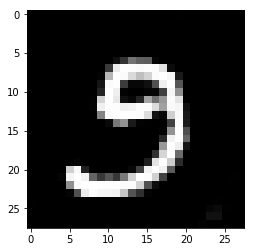

epoch: 30
discriminator loss: 1.2033262252807617        generator loss: 4.784187316894531


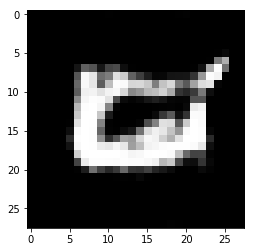

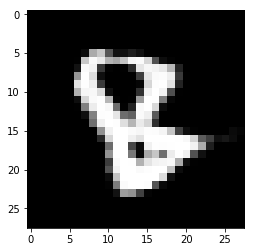

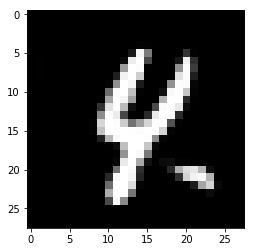

time: 661.4006822109222


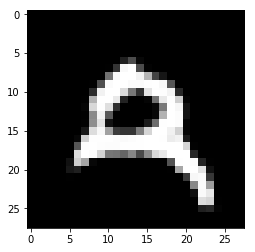

epoch: 31
discriminator loss: 0.29891854524612427        generator loss: 3.7926738262176514


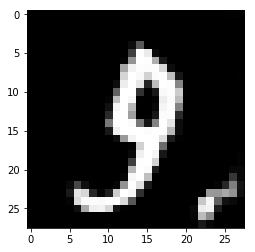

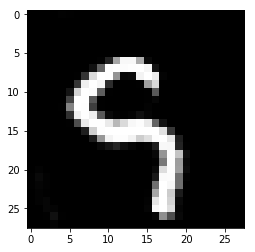

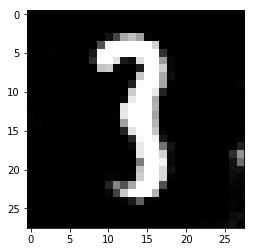

time: 658.5128462314606


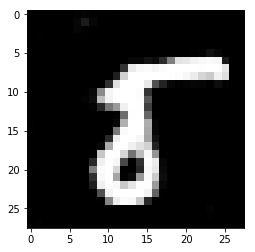

epoch: 32
discriminator loss: 0.36385124921798706        generator loss: 3.7151682376861572


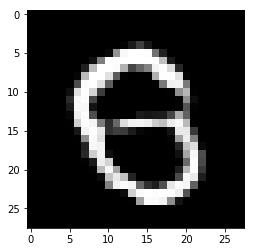

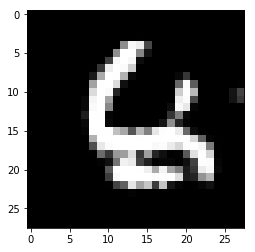

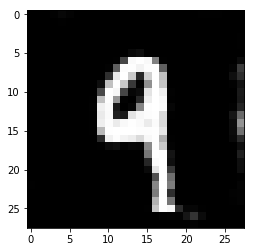

time: 638.6304142475128


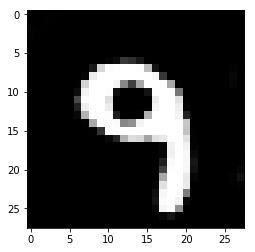

epoch: 33
discriminator loss: 0.4063151180744171        generator loss: 4.012087821960449


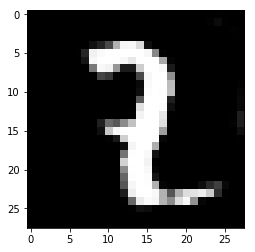

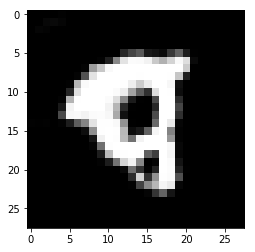

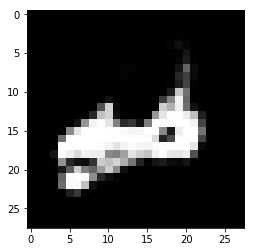

time: 628.9153747558594


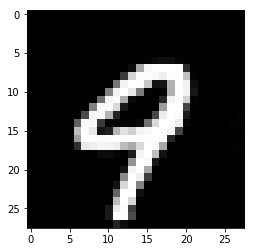

epoch: 34
discriminator loss: 0.38933590054512024        generator loss: 4.187162399291992


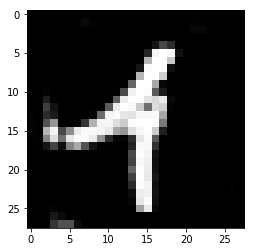

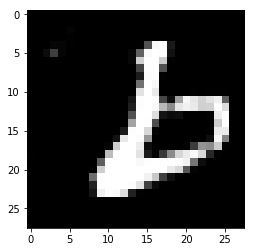

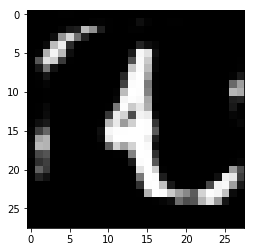

time: 656.6169235706329


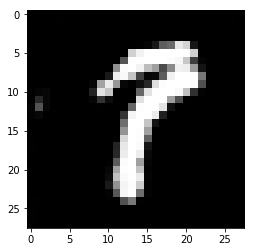

epoch: 35
discriminator loss: 0.3555317521095276        generator loss: 3.8902475833892822


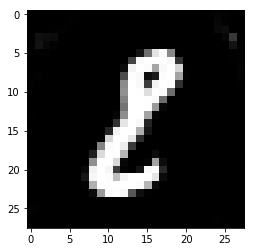

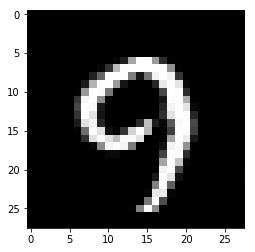

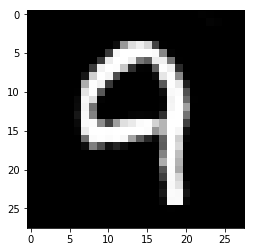

time: 717.602299451828


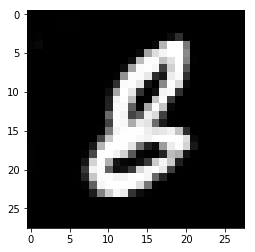

epoch: 36
discriminator loss: 0.7638436555862427        generator loss: 2.2873568534851074


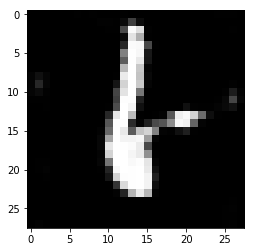

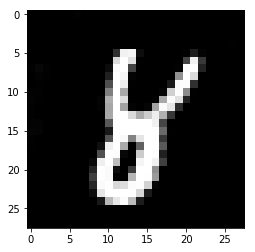

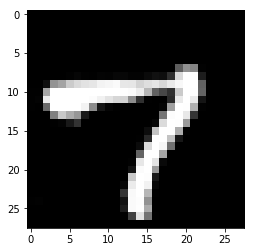

time: 638.510012626648


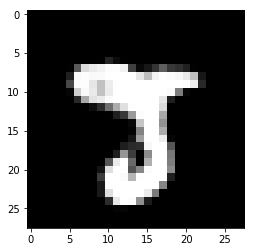

epoch: 37
discriminator loss: 0.2684760093688965        generator loss: 4.517868518829346


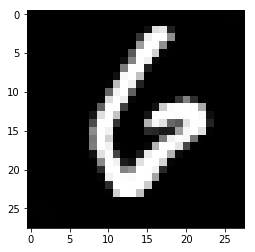

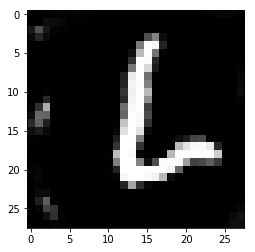

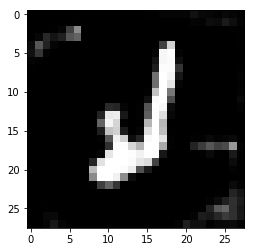

time: 654.9123866558075


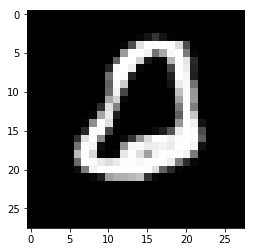

epoch: 38
discriminator loss: 0.5816036462783813        generator loss: 3.592191696166992


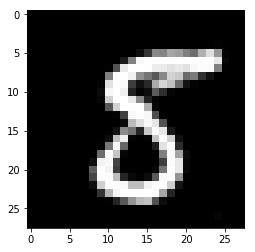

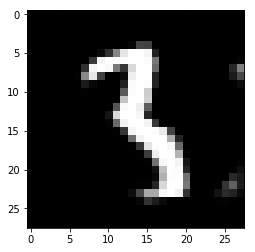

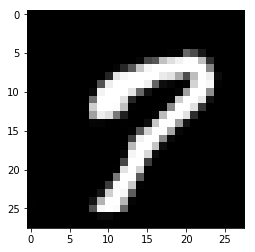

time: 634.1439995765686


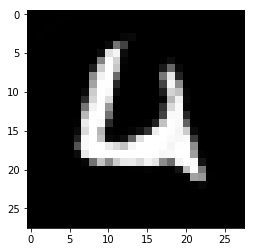

epoch: 39
discriminator loss: 0.4470049738883972        generator loss: 3.0794036388397217


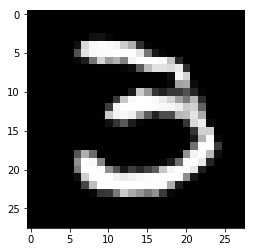

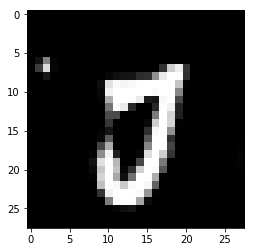

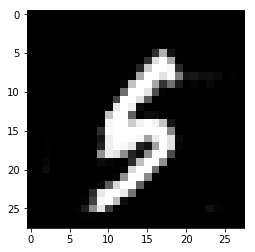

time: 722.2737758159637


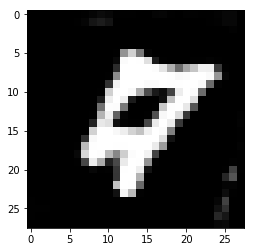

epoch: 40
discriminator loss: 0.4140416383743286        generator loss: 3.7950682640075684


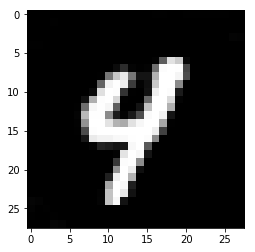

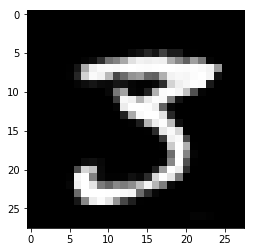

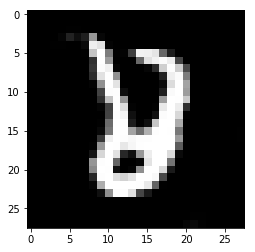

time: 681.7134249210358


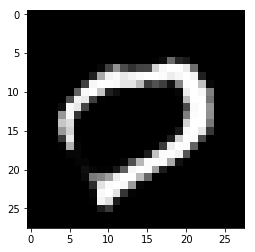

epoch: 41
discriminator loss: 0.32666048407554626        generator loss: 3.685035228729248


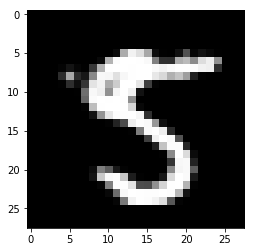

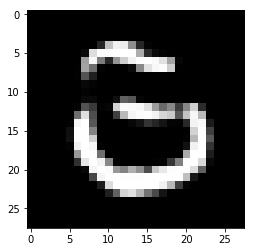

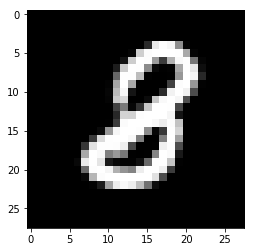

time: 635.6781387329102


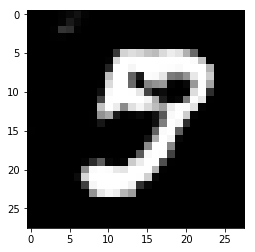

epoch: 42
discriminator loss: 0.14211536943912506        generator loss: 5.249073028564453


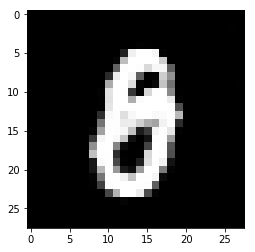

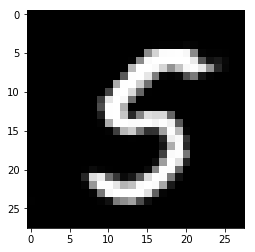

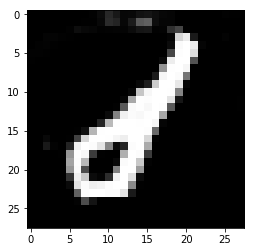

time: 642.2546153068542


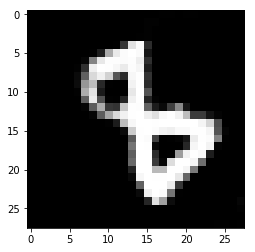

epoch: 43
discriminator loss: 0.5082098841667175        generator loss: 1.894714117050171


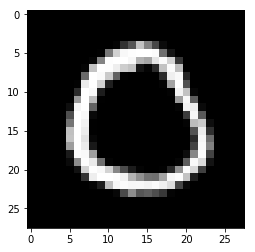

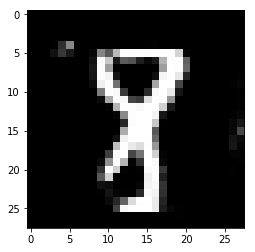

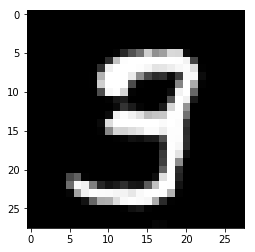

time: 627.9906377792358


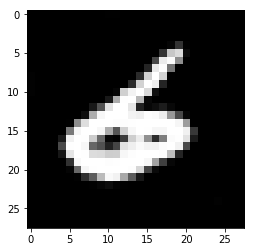

epoch: 44
discriminator loss: 0.4448437988758087        generator loss: 2.1800425052642822


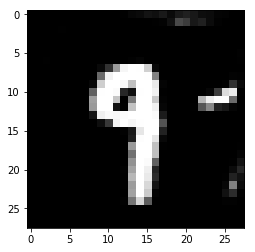

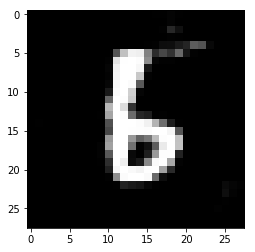

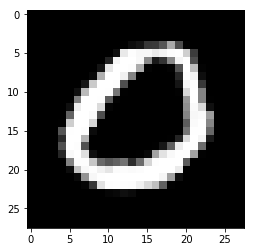

time: 626.0125036239624


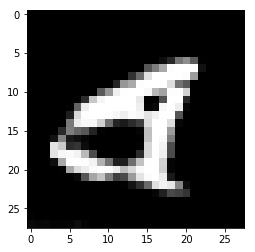

epoch: 45
discriminator loss: 0.30265724658966064        generator loss: 2.7049624919891357


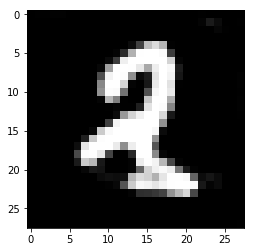

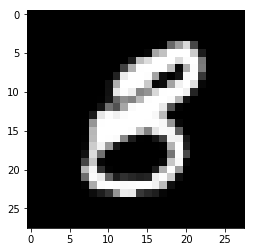

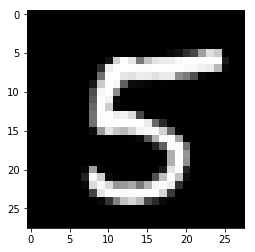

time: 626.968997001648


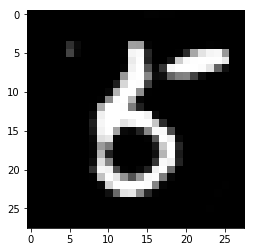

epoch: 46
discriminator loss: 0.49896925687789917        generator loss: 1.5270121097564697


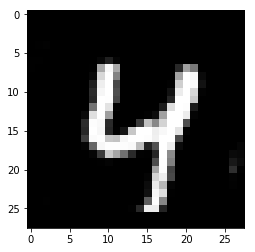

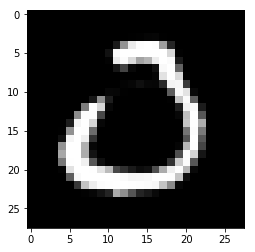

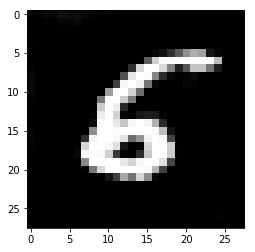

time: 623.8986830711365


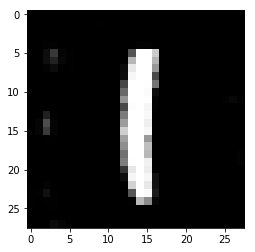

epoch: 47
discriminator loss: 0.2368195354938507        generator loss: 4.066462516784668


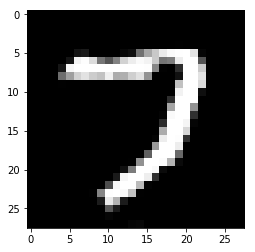

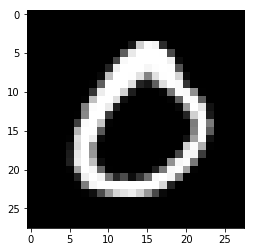

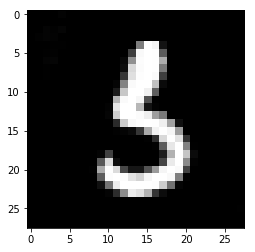

time: 627.3658800125122


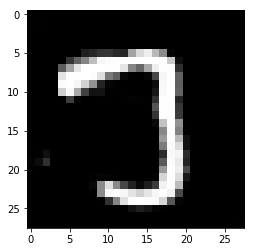

epoch: 48
discriminator loss: 0.3703387379646301        generator loss: 2.747851848602295


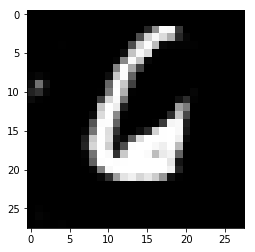

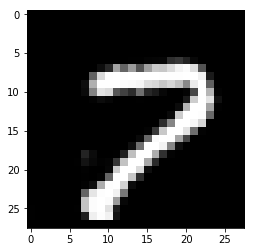

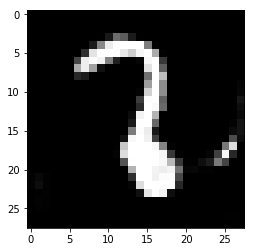

time: 625.9289228916168


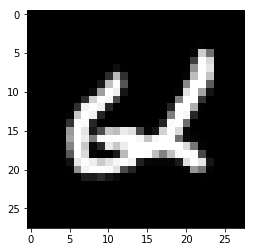

epoch: 49
discriminator loss: 0.2881423830986023        generator loss: 3.4882500171661377


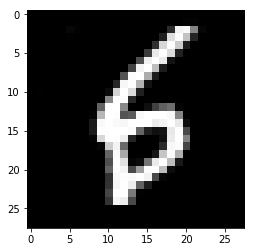

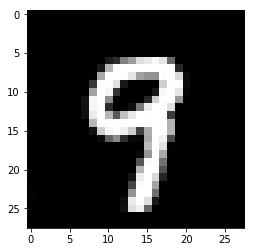

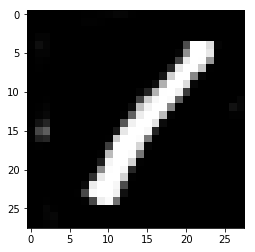

time: 629.301164150238


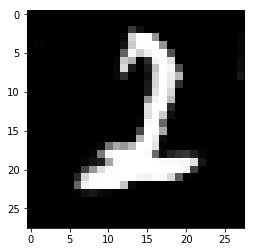

epoch: 50
discriminator loss: 0.23297396302223206        generator loss: 5.178589820861816


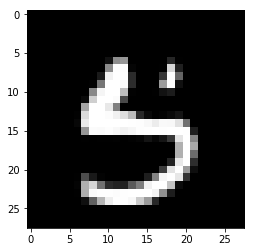

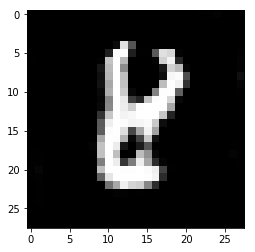

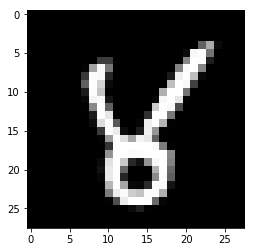

time: 660.8234667778015


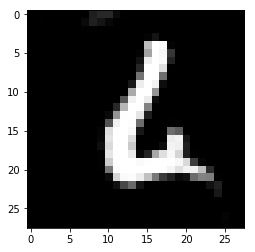

epoch: 51
discriminator loss: 0.5800912976264954        generator loss: 2.659536600112915


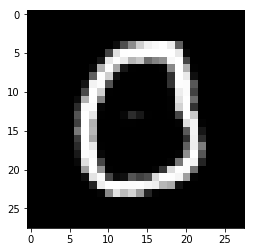

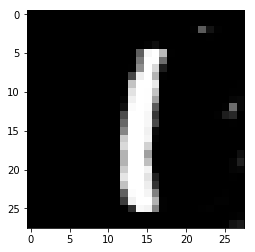

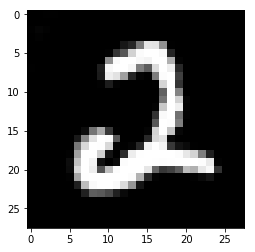

time: 645.5910406112671


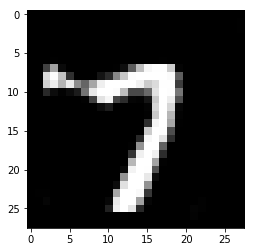

epoch: 52
discriminator loss: 0.6023731231689453        generator loss: 2.8020241260528564


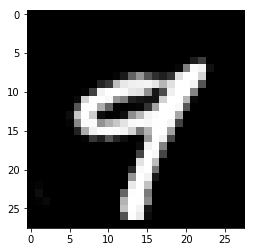

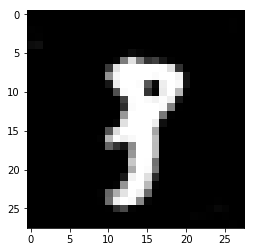

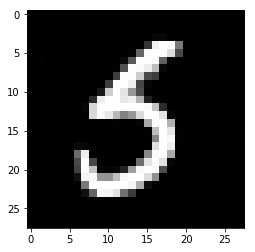

time: 664.445853471756


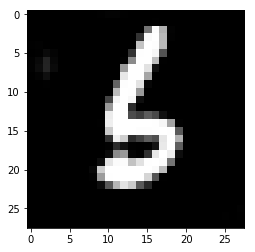

epoch: 53
discriminator loss: 0.35441869497299194        generator loss: 2.899216890335083


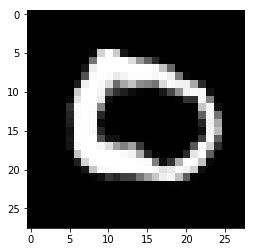

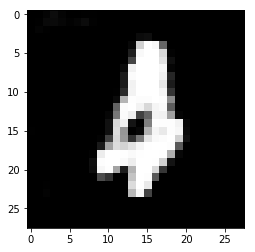

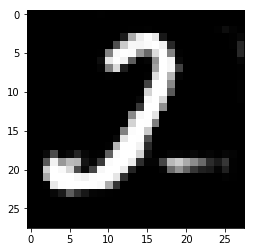

time: 632.9472725391388


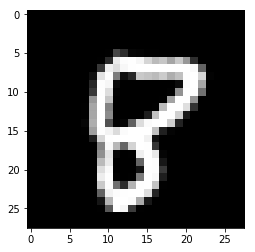

epoch: 54
discriminator loss: 0.3756271004676819        generator loss: 2.9168930053710938


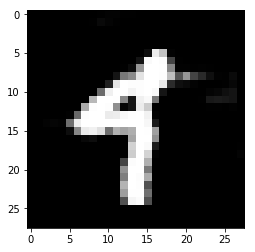

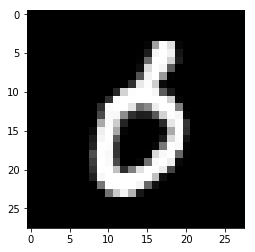

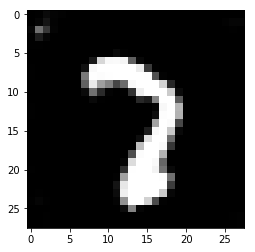

time: 632.4206857681274


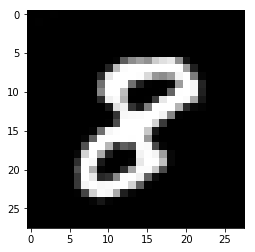

epoch: 55
discriminator loss: 0.44760918617248535        generator loss: 4.688326358795166


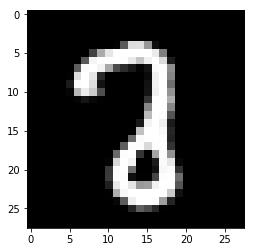

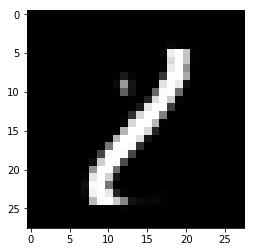

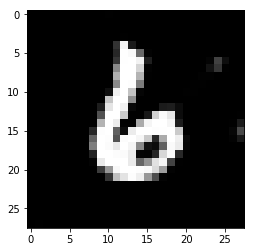

time: 697.0194985866547


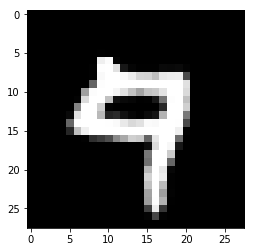

epoch: 56
discriminator loss: 0.8864008188247681        generator loss: 3.5400631427764893


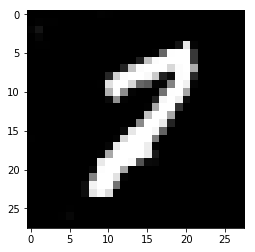

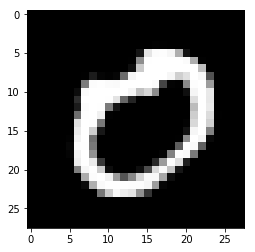

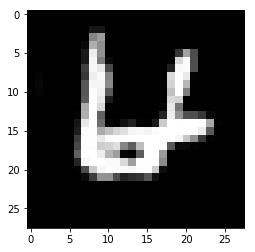

time: 694.1618189811707


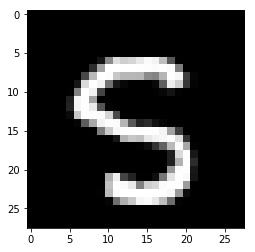

epoch: 57
discriminator loss: 0.8129697442054749        generator loss: 4.936126708984375


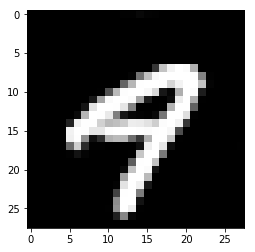

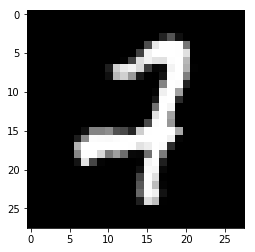

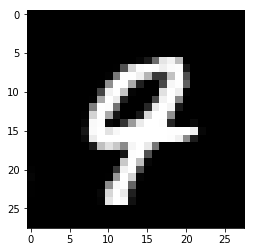

time: 650.8302397727966


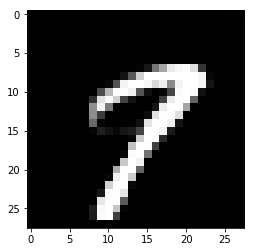

epoch: 58
discriminator loss: 0.7645125389099121        generator loss: 3.1891629695892334


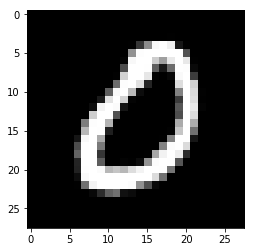

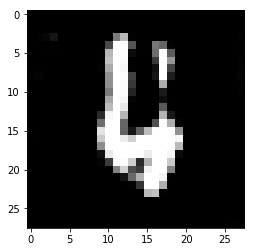

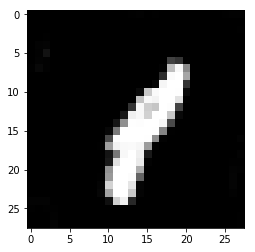

time: 642.6170942783356


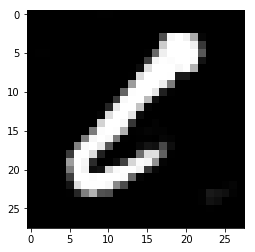

epoch: 59
discriminator loss: 0.39609193801879883        generator loss: 2.4562015533447266


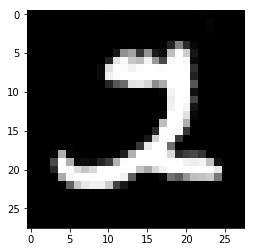

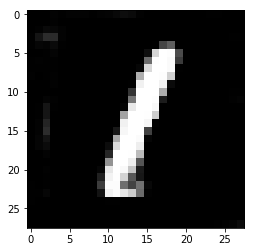

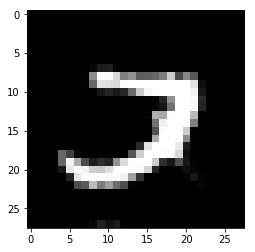

time: 630.093817949295


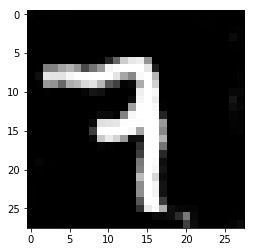

epoch: 60
discriminator loss: 0.3793729543685913        generator loss: 3.2492191791534424


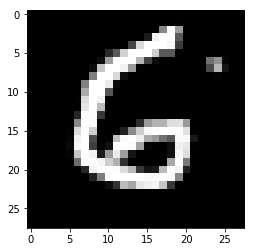

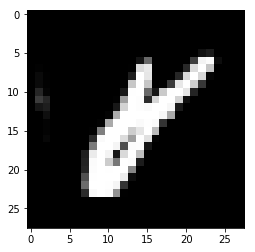

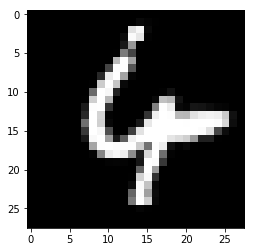

time: 627.044278383255


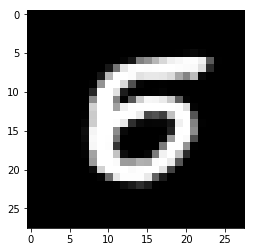

epoch: 61
discriminator loss: 0.677449643611908        generator loss: 3.633694887161255


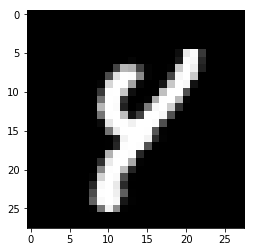

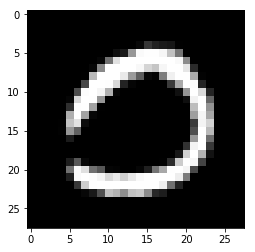

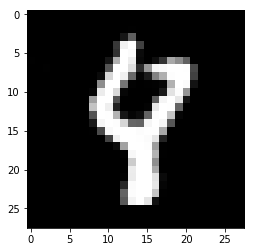

time: 626.7993745803833


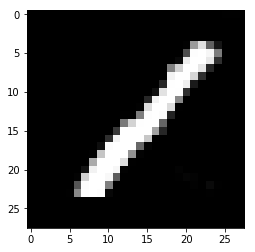

epoch: 62
discriminator loss: 0.6692010164260864        generator loss: 2.082904100418091


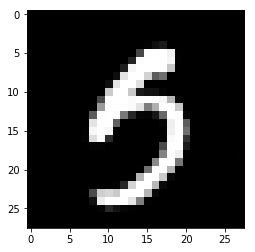

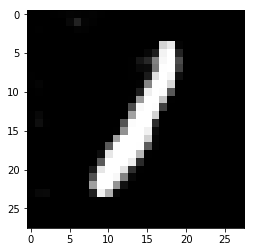

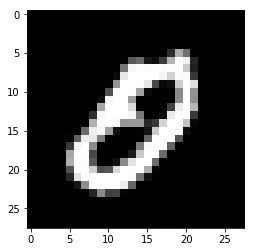

time: 627.5920906066895


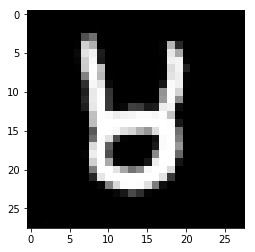

epoch: 63
discriminator loss: 0.29065150022506714        generator loss: 4.86053466796875


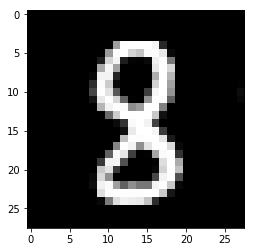

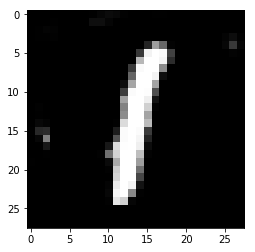

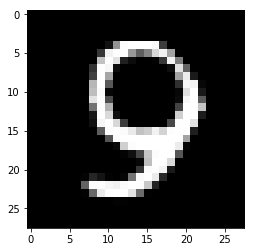

time: 718.8857192993164


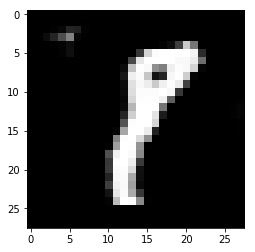

epoch: 64
discriminator loss: 0.46820753812789917        generator loss: 2.281501531600952


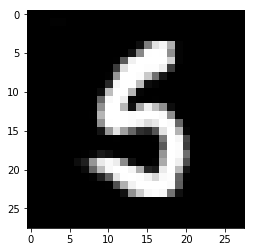

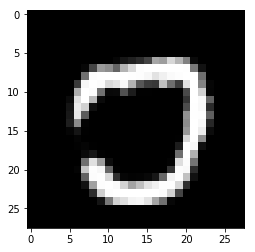

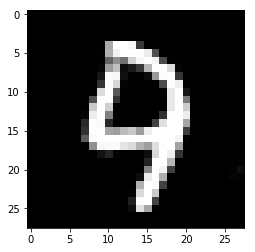

time: 684.9703447818756


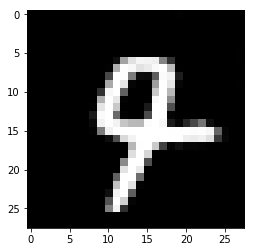

epoch: 65
discriminator loss: 0.5818282961845398        generator loss: 3.5293667316436768


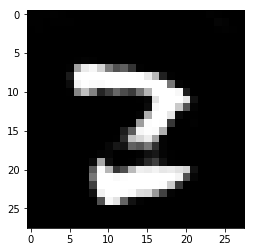

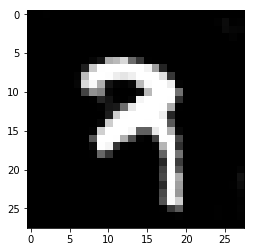

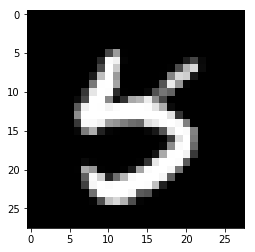

time: 628.3619091510773


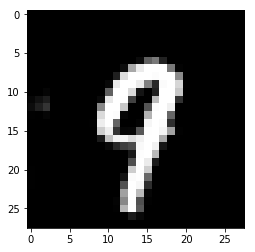

epoch: 66
discriminator loss: 0.45648449659347534        generator loss: 3.0371460914611816


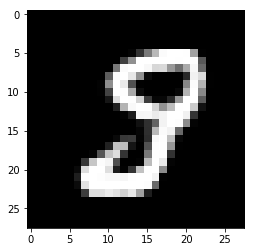

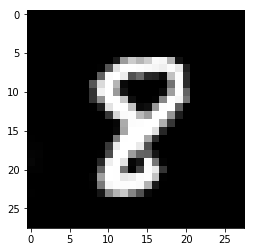

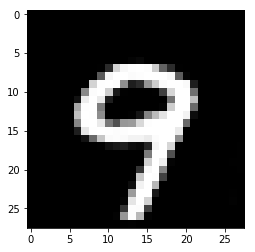

time: 627.8183052539825


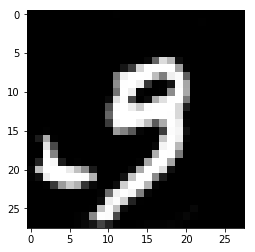

epoch: 67
discriminator loss: 0.4383404850959778        generator loss: 3.1804561614990234


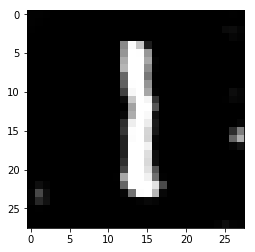

KeyboardInterrupt: 

In [11]:
for i in range(epoch):
    epoch_start_time = time.time()
    for j in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(100)
        batch_images = batch[0].reshape((batch_size, 28,28,1))
        batch = batch_images*2 - 1
        feed_dict = {x: batch, z: np.random.uniform(-1., 1., size=[batch_size, 100])}
        _, d_error, d_pred_real, d_pred_fake = session.run(
            [D_opt, D_loss, D_real, D_fake], feed_dict=feed_dict
        )

        # 2. Train Generator
        feed_dict = {z: np.random.uniform(-1., 1., size=[len(batch[0]), 100])}
        _, g_error = session.run(
            [G_opt, G_loss], feed_dict=feed_dict
        )
        if(j%200==0):
            test_images = session.run( generated_image, feed_dict={z:np.random.uniform(-1., 1., size=[1, 100])})
            test_images = test_images.reshape(28,28)
            #path= 'Fixed_results/'+i+'.png'
            #io.imsave('path', test_images)
            plt.imshow(test_images, cmap='gray')
            plt.show()
    epoch_end_time = time.time()
    print('time: {}'.format(epoch_end_time - epoch_start_time))
    # Generate images from test noise
    test_images = session.run( generated_image, feed_dict={z:np.random.uniform(-1., 1., size=[1, 100])})
    test_images = test_images.reshape(28,28)
    #path= 'Fixed_results/'+str(i)+'.png'
    #io.imsave('path', test_images)
    plt.imshow(test_images, cmap='gray')
    plt.show()
            
    print('epoch: {}'.format(i))

    print('discriminator loss: {}        generator loss: {}'.format(d_error, g_error))

            